In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [7]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

#need info for: city, Temp, cloudiness, humidity, windspeed, lat, long
# City        -- weather_json['name'] 
# Cloudiness  -- weather_json['clouds']['all']  
# Country     -- weather_json['sys']['country']   
# Date        -- weather_json['dt']
# Humidity    -- weather_json['main']['humidity']
# Lat         -- weather_json['coord']['lat']
# Lng         -- weather_json['coord']['lon']  
# Max Temp    -- weather_json['main']['temp_max']    
# Wind Speed  -- weather_json['wind']['speed']  

In [8]:
#lists to hold weather data
city_name = []
cloudines = []
country =[]
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
not_found = []
loop=1

units='imperial'
base_url= 'http://api.openweathermap.org/data/2.5/weather?'

In [9]:
# Iterate through list of cities previously generated
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name)
print('Beginning Data Retrieval')    
print('-----------------------------')

for x in cities:
#     Query each city within list 
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
    weather_response = requests.get(query_url + x)
    weather_json=weather_response.json()
    
#     Use exceptions to account for cities not found in API
    try:
#       Request information from API needed for assignment for each city
        city_name.append(weather_json['name'])
        cloudines.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        print(f'Processing Record {loop} | {x}')
#     KeyError occurs when city not found (no reponse to query into)
    except KeyError:
        not_found.append(x)
        print(f'City ({x}) not found. Skipping...')
        loop=loop-1
    loop+=1
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | talitsy
Processing Record 2 | baturaja
Processing Record 3 | guangzhou
Processing Record 4 | santo antonio do ica
Processing Record 5 | hobart
Processing Record 6 | bluff
Processing Record 7 | kruisfontein
Processing Record 8 | ushuaia
Processing Record 9 | hithadhoo
Processing Record 10 | keti bandar
Processing Record 11 | busselton
Processing Record 12 | yellowknife
Processing Record 13 | norman wells
City (tsihombe) not found. Skipping...
Processing Record 14 | tirano
Processing Record 15 | sioux lookout
Processing Record 16 | mataura
Processing Record 17 | jaisalmer
Processing Record 18 | albany
Processing Record 19 | dickinson
Processing Record 20 | kandrian
Processing Record 21 | dikson
Processing Record 22 | puerto ayora
Processing Record 23 | hamilton
Processing Record 24 | tasiilaq
Processing Record 25 | bilma
Processing Record 26 | cidreira
City (haibowan) not found. Skipping...
City (alotau) not fou

Processing Record 220 | montivilliers
Processing Record 221 | goba
Processing Record 222 | ordzhonikidze
Processing Record 223 | turka
Processing Record 224 | viedma
Processing Record 225 | bardiyah
Processing Record 226 | tavda
Processing Record 227 | talnakh
Processing Record 228 | bathsheba
Processing Record 229 | jinxiang
Processing Record 230 | bourail
Processing Record 231 | nishihara
Processing Record 232 | monrovia
Processing Record 233 | bac lieu
Processing Record 234 | fortuna
Processing Record 235 | deputatskiy
Processing Record 236 | sisophon
Processing Record 237 | vila velha
Processing Record 238 | rio grande
Processing Record 239 | port hardy
Processing Record 240 | geraldton
Processing Record 241 | thompson
Processing Record 242 | berlevag
Processing Record 243 | buzmeyin
Processing Record 244 | shenjiamen
City (amderma) not found. Skipping...
Processing Record 245 | mineral wells
Processing Record 246 | alice springs
Processing Record 247 | hearst
Processing Record 248

Processing Record 451 | mount gambier
Processing Record 452 | inirida
Processing Record 453 | xinxiang
Processing Record 454 | limbang
Processing Record 455 | praia
Processing Record 456 | zacatecoluca
Processing Record 457 | earlston
Processing Record 458 | harper
Processing Record 459 | puerto del rosario
Processing Record 460 | coahuayana
Processing Record 461 | manaus
Processing Record 462 | cumbal
Processing Record 463 | moron
Processing Record 464 | grajau
Processing Record 465 | jiutai
Processing Record 466 | lompoc
Processing Record 467 | terre-de-bas
Processing Record 468 | meulaboh
Processing Record 469 | champerico
Processing Record 470 | beloha
Processing Record 471 | carandai
Processing Record 472 | lexington park
Processing Record 473 | tabriz
Processing Record 474 | wuwei
Processing Record 475 | khor
Processing Record 476 | copala
Processing Record 477 | dan khun thot
Processing Record 478 | qui nhon
Processing Record 479 | oro valley
Processing Record 480 | peniche
Proc

In [10]:
for city in date:
    print(city)
   

1583865572
1583865572
1583865572
1583865572
1583865572
1583865572
1583865572
1583865522
1583865573
1583865573
1583865573
1583865530
1583865573
1583865573
1583865573
1583865573
1583865573
1583865376
1583865422
1583865573
1583865573
1583865574
1583865313
1583865574
1583865574
1583865574
1583865574
1583865574
1583865574
1583865574
1583865575
1583865575
1583865509
1583865575
1583865302
1583865575
1583865575
1583865575
1583865575
1583865575
1583865575
1583865575
1583865575
1583865576
1583865576
1583865576
1583865576
1583865576
1583865396
1583865455
1583865576
1583865576
1583865576
1583865576
1583865576
1583865576
1583865577
1583865577
1583865430
1583865577
1583865577
1583865577
1583865577
1583865577
1583865531
1583865577
1583865577
1583865577
1583865578
1583865578
1583865578
1583865578
1583865323
1583865578
1583865578
1583865578
1583865578
1583865578
1583865578
1583865579
1583865579
1583865579
1583865302
1583865579
1583865579
1583865579
1583865479
1583865579
1583865579
1583865579
1583865545

In [11]:
# Some cities not found
print(f'{len(not_found)}/{len(cities)} cities were not found')

# Create new list excluding the missing information
not_found=set(not_found)
cities=set(cities)
updated_cities = list(cities-not_found)

#should it be run again?

47/620 cities were not found


In [12]:
dates=[]
for city in date:
    date_test=city
    date_conversion=time.gmtime(date_test)
    date_format=time.strftime('%m/%d/%Y',date_conversion )
    dates.append(date_format)
dates

['03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/2020',
 '03/10/20

In [13]:
# Export the city data into a .csv.
# before making data frame shojld each list be put into csv?

In [14]:
# Create data frame with lists for each city
weather_df=pd.DataFrame({"City": city_name,
                        'Cloudiness': cloudines,
                        'Country': country,
                        'Date': date,
                        'Humidity (%)': humidity,
                        'Latitude': lat,
                        'Longitude': lon,
                        'Max Temperature': max_temp,
                        'Wind Speed (MPH)': wind_speed})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity (%),Latitude,Longitude,Max Temperature,Wind Speed (MPH)
0,Talitsy,71,RU,1583865572,96,56.53,42.33,38.57,3.36
1,Baturaja,100,ID,1583865572,94,-4.13,104.17,74.35,1.07
2,Guangzhou,0,CN,1583865572,55,23.12,113.25,69.01,4.47
3,Santo Antônio do Içá,24,BR,1583865572,89,-3.10,-67.94,83.21,5.66
4,Hobart,0,AU,1583865572,81,-42.88,147.33,51.80,9.17


In [15]:
# PLOTTING

(-36.58, 108.0)

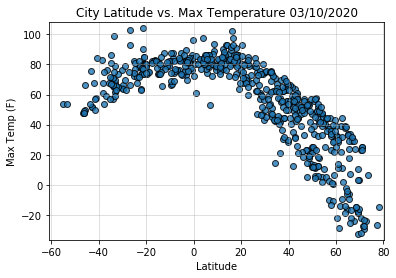

In [16]:
# Latitude vs. Temperature Plot
x_latitude = weather_df.loc[:,'Latitude']
y_temp = weather_df.loc[:,'Max Temperature']
plt.scatter(x_latitude,y_temp, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Max Temperature {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-6,max(x_latitude)+2)
plt.ylim(min(y_temp)-4,max(y_temp)+4)

(0, 104)

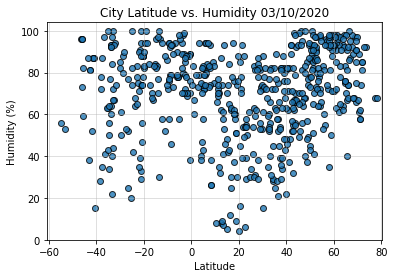

In [17]:
# Latitude vs. Humidity Plot
y_humidity = weather_df.loc[:,'Humidity (%)']
plt.scatter(x_latitude,y_humidity, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Humidity {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-6,max(x_latitude)+2)
plt.ylim(min(y_humidity)-4,max(y_humidity)+4)

(0, 104)

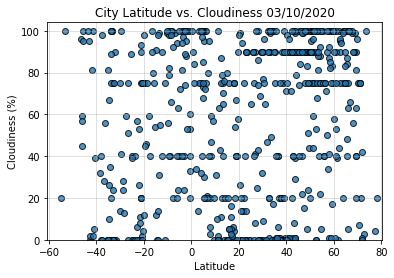

In [18]:
# Latitude vs. Cloudiness Plot
y_cloudiness = weather_df.loc[:,'Cloudiness']
plt.scatter(x_latitude,y_cloudiness, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-6,max(x_latitude)+2)
plt.ylim(min(y_humidity)-4,max(y_humidity)+4)

(-1.87, 43.2)

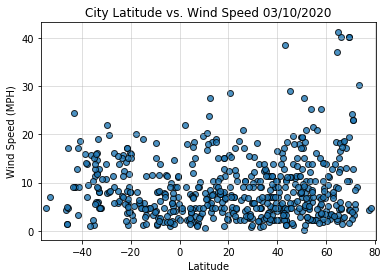

In [19]:
# Latitude vs. Wind Speed Plot
y_wind = weather_df.loc[:,'Wind Speed (MPH)']
plt.scatter(x_latitude,y_wind, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Wind Speed {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-2,max(x_latitude)+2)
plt.ylim(min(y_wind)-2,max(y_wind)+2)

In [142]:
# Create Northern and Southern Hemisphere DataFrames 
# Northern: Lat 0 - 90
# Southern: Lat 0 - (-90)
northern_df= weather_df.loc[weather_df['Latitude']>=0]
southern_df= weather_df.loc[weather_df['Latitude']<0]

#These will be the x,y axis for plots needed
n_latitude = northern_df.loc[:,'Latitude']
s_latitude = southern_df.loc[:,'Latitude']
n_temp = northern_df.loc[:,'Max Temperature']
s_temp = southern_df.loc[:,'Max Temperature']
n_humidity = northern_df.loc[:,'Humidity (%)']
s_humidity = southern_df.loc[:,'Humidity (%)']
n_cloudiness = northern_df.loc[:,'Cloudiness']
s_cloudiness = southern_df.loc[:,'Cloudiness']

In [167]:
#Create function to plot each graph with line of best fit:
def plot_graph(x,y):
    plt.scatter(x,y)
    plt.xlim(min(x)-3,max(x)+2)
    plt.ylim(min(y)-4,max(y)+4)
    #Correlation
    _slope, _int, _r, _p, _std_err = st.linregress(x, y)
    best_fit = _slope * x + _int
    plt.plot(x,best_fit,"r-", linewidth=.5)
    line_eq = "y = " + str(round(_slope,2)) + "x + " + str(round(_int,2))
    plt.annotate(line_eq,(min(x)+10,min(y)+20),fontsize=12,color="red")
    #pearon correlation statement
    pearson_r=st.pearsonr(x,y)[0]
    if abs(pearson_r)>0.7:
        print(f'The r value is {round(pearson_r,2)}, there is strong correlation between the city latitude and weather')
    elif abs(pearson_r)>0.5:
        print(f'The r value is {round(pearson_r,2)}, there is a moderate correlation between the city latitude and weather')
    elif abs(pearson_r)>0.3:
        print(f'The r value is {round(pearson_r,2)}, there is a weak correlation between the city latitude and weather')
    else:
        print(f'The r value is {round(pearson_r,2)}, there is no correlation between the city latitude and weather')
        

The r value is -0.86, there is strong correlation between the city latitude and weather


Text(0, 0.5, 'Max Temp (F)')

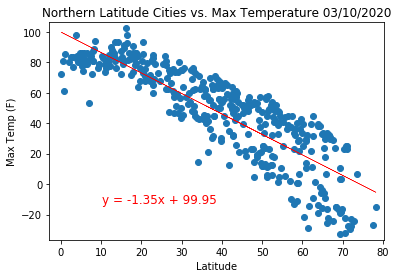

In [157]:
# NORTHERN Latitude vs. Temperature Plot
plot_graph(n_latitude,n_temp)

#format
plt.title(f"Northern Latitude Cities vs. Max Temperature {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


The r value is 0.62, there is a moderate correlation between the city latitude and weather


Text(0, 0.5, 'Max Temp (F)')

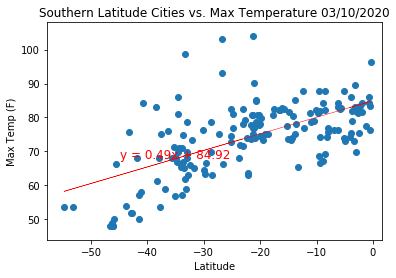

In [159]:
# SOUTHERN Latitude vs. Temperature Plot
plot_graph(s_latitude,s_temp)

plt.title(f"Southern Latitude Cities vs. Max Temperature {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

The r value is 0.36, there is a weak correlation between the city latitude and weather


Text(0, 0.5, 'Humidity (%)')

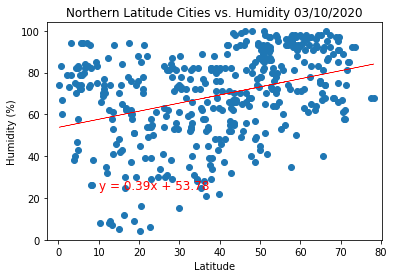

In [164]:
# NORTHERN Latitude vs. Humidity Plot
plot_graph(n_latitude,n_humidity)

plt.title(f"Northern Latitude Cities vs. Humidity {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The r value is 0.22, there is no correlation between the city latitude and weather


Text(0, 0.5, 'Humidity (%)')

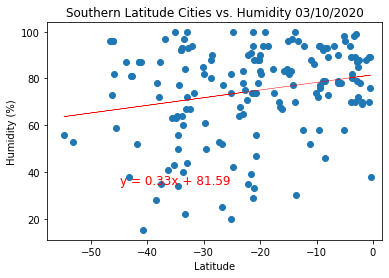

In [168]:
# SOUTHERN Latitude vs. Humidity Plot
plot_graph(s_latitude,s_humidity)
plt.title(f"Southern Latitude Cities vs. Humidity {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The r value is 0.24, there is no correlation between the city latitude and weather


Text(0, 0.5, 'Cloudiness (%)')

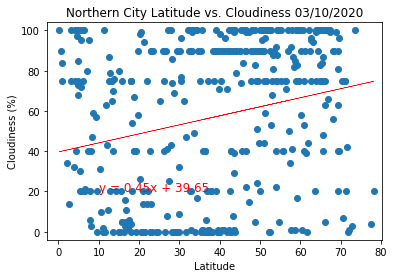

In [169]:
# NORTHERN Latitude vs. Cloudiness Plot
plot_graph(n_latitude,n_cloudiness)
plt.title(f"Northern City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")

The r value is 0.24, there is no correlation between the city latitude and weather


Text(0, 0.5, 'Cloudiness (%)')

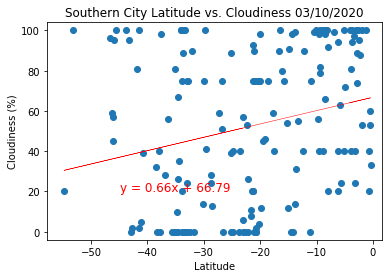

In [170]:
# SOUTHERN Latitude vs. Cloudiness Plot
plot_graph(s_latitude,s_cloudiness)
plt.title(f"Southern City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The r value is 0.24, there is no correlation between the city latitude and weather


Text(0, 0.5, 'Cloudiness (%)')

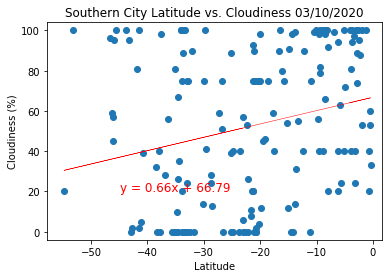

In [171]:
plot_graph(s_latitude,s_cloudiness)
plt.title(f"Southern City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")